## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

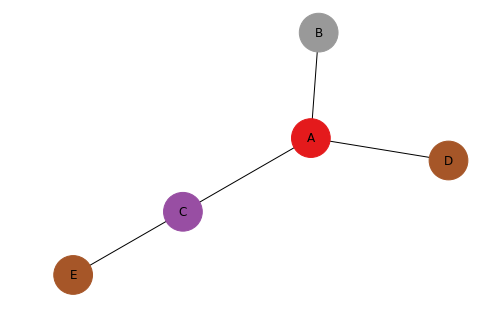

In [8]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group4','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)